In [74]:
print("hello world")

hello world


In [75]:
import torch 
import torch.nn as nn
import  torchvision 
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import PIL


In [76]:
#variables required 

batch_size = 64
num_classes=10
learning_rate = 0.01
epochs = 10



In [77]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [78]:
train_dataset=torchvision.datasets.MNIST(
  root="./data",
    train=True, 
    transform=transforms.Compose([
      transforms.Resize((32,32)),
      transforms.ToTensor(),
      transforms.Normalize(mean=(0.137), std=(0.3801))
       ]),
    download=True 
)

In [79]:
test_dataset=torchvision.datasets.MNIST(
  root="./data",
  train=False,
  transform=transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.137), std=(0.3801))
    
    
  ]),
  download=True 
  
)

In [80]:
print(len(train_dataset))
print(len(test_dataset))

60000
10000


In [81]:
train_loader=torch.utils.data.DataLoader(train_dataset,
                                         batch_size=batch_size,
                                         shuffle=True)

test_loader=torch.utils.data.DataLoader(test_dataset,
                                        batch_size=batch_size,
                                        shuffle=True)


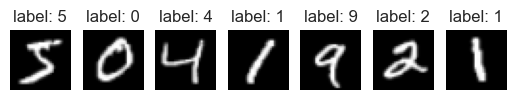

In [82]:
for i in range(7):
    image, label = train_dataset[i]
    plt.subplot(1, 7, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')  # Add parentheses to call the squeeze method
    plt.axis('off')
    plt.title(f"label: {label}")
plt.show()

  
  

In [83]:
#lenet Architecture

class LeNet5(nn.Module):
  def __init__(self,num_classes=10):
    super(LeNet5, self).__init__()
    self.layer1=nn.Sequential(
        nn.Conv2d(1,6,kernel_size=5,stride=1,padding=0),
        nn.BatchNorm2d(6),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2), 
      )
    self.layer2=nn.Sequential(
      nn.Conv2d(6,16,kernel_size=5,stride=1,padding=0),
      nn.BatchNorm2d(16),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,stride=2),       
    )  
    # self.layer3=nn.Sequential(
    #      nn.Conv2d(16,120,kernel_size=5,stride=1,padding=0),
    #      nn.ReLU()
    #  ) 
    self.fc=nn.Linear(16*5*5,120)
    self.relu1= nn.ReLU()
    self.fc1=nn.Linear(120,84)
    self.relu2=nn.ReLU()
    self.fc2=nn.Linear(84,num_classes)
      
      
  def forward(self,x):
      out=self.layer1(x)
      out=self.layer2(out)
      out=out.reshape(out.size(0),-1)
      out=self.fc(out)
      out=self.relu1(out)
      out=self.fc1(out)
      out=self.relu2(out)
      out=self.fc2(out)
      # flattened_size = out.numel() // out.size(0)
      # print(flattened_size)
      return out
  


In [84]:
#model and hyperparameters
model=LeNet5(num_classes=10)
model=model.to(device)
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
total_step=len(train_loader)


In [85]:
#model training 
for epoch in range(epochs):  # Loop over epochs
    model.train()  # Ensure the model is in training mode

    running_loss = 0.0
    for step, (inputs, labels) in enumerate(train_loader):  # Loop over batches
        # Move data to device (GPU/CPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Accumulate the loss
        running_loss += loss.item()

        # Print every 400 steps
        if step % 400 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{step}/{len(train_loader)}], Loss: {loss.item():.4f}")

    # Print the average loss for the epoch
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{epochs}], Average Loss: {avg_loss:.4f}")



Epoch [1/10], Step [0/938], Loss: 2.2957
Epoch [1/10], Step [400/938], Loss: 0.0395
Epoch [1/10], Step [800/938], Loss: 0.0913
Epoch [1/10], Average Loss: 0.1397
Epoch [2/10], Step [0/938], Loss: 0.0528
Epoch [2/10], Step [400/938], Loss: 0.0270
Epoch [2/10], Step [800/938], Loss: 0.0796
Epoch [2/10], Average Loss: 0.0645
Epoch [3/10], Step [0/938], Loss: 0.1376
Epoch [3/10], Step [400/938], Loss: 0.0612
Epoch [3/10], Step [800/938], Loss: 0.0306
Epoch [3/10], Average Loss: 0.0541
Epoch [4/10], Step [0/938], Loss: 0.0631
Epoch [4/10], Step [400/938], Loss: 0.0028
Epoch [4/10], Step [800/938], Loss: 0.0424
Epoch [4/10], Average Loss: 0.0467
Epoch [5/10], Step [0/938], Loss: 0.0045
Epoch [5/10], Step [400/938], Loss: 0.0566
Epoch [5/10], Step [800/938], Loss: 0.0610
Epoch [5/10], Average Loss: 0.0408
Epoch [6/10], Step [0/938], Loss: 0.3011
Epoch [6/10], Step [400/938], Loss: 0.0166
Epoch [6/10], Step [800/938], Loss: 0.0262
Epoch [6/10], Average Loss: 0.0421
Epoch [7/10], Step [0/938], 

In [86]:
with torch.inference_mode():
    correct=0
    total=0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct +=(predicted==labels).sum().item()
        print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 98.4375 %
Accuracy of the network on the 10000 test images: 97.65625 %
Accuracy of the network on the 10000 test images: 98.4375 %
Accuracy of the network on the 10000 test images: 98.4375 %
Accuracy of the network on the 10000 test images: 97.8125 %
Accuracy of the network on the 10000 test images: 97.65625 %
Accuracy of the network on the 10000 test images: 97.76785714285714 %
Accuracy of the network on the 10000 test images: 97.8515625 %
Accuracy of the network on the 10000 test images: 98.09027777777777 %
Accuracy of the network on the 10000 test images: 98.28125 %
Accuracy of the network on the 10000 test images: 98.29545454545455 %
Accuracy of the network on the 10000 test images: 98.4375 %
Accuracy of the network on the 10000 test images: 98.4375 %
Accuracy of the network on the 10000 test images: 98.54910714285714 %
Accuracy of the network on the 10000 test images: 98.64583333333333 %
Accuracy of the network on the 10000 test im